# Introduction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
The dataset contains following columns:
* id
* date
* price
* bedrooms 
* bathrooms
* sqft_living
* sqft_lot
* floors
* waterfront
* view
* condition
* grade
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* zipcode
* lat
* long
* sqft_living15
* sqft_lot15

In this kernel,
##### * We will do EDA of prices with respect to different features and visualize their relationship.
##### * Run feature selection algorithms to eliminate least important and unwanted features.
##### * And, finally build models on the selected features.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [3]:
pd.set_option('max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# remove id and date column
df.drop(['id', 'date'], axis = 1, inplace=True)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
a=df["floors"].value_counts().to_frame()
a

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

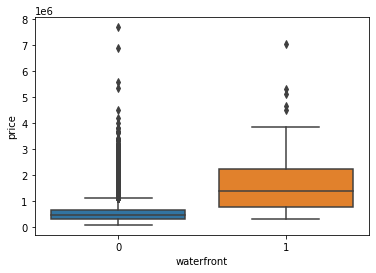

In [10]:

sns.boxplot(x=df["waterfront"],y=df["price"])

In [11]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [12]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [13]:
Y = df['price']
lm2 = LinearRegression()
lm2.fit(df[features],Y)

print("The Predicted values are mentioned as: " + str (lm2.predict(df[features])))

print("The R^2 value is :" + str (lm2.score(df[features],Y)))

The Predicted values are mentioned as: [287160.14176653 661944.14176653 308152.14176653 ... 303544.14176653
 426424.14176653 303544.14176653]
The R^2 value is :0.6576672506165839


In [14]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



In [15]:
pipe =Pipeline(Input)
pipe.fit(df[features],Y)
print("The predicted values are: " + str(pipe.predict(df[features])))
print("The R^2 value is :" + str (pipe.score(df[features], Y)))

The predicted values are: [349652.25 559258.25 447790.   ... 418785.5  459666.5  418753.5 ]
The R^2 value is :0.7513469726026186


In [16]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])




NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel = Ridge(alpha =0.1)
RidgeModel.fit(x_train, y_train)
print("The predicted values are: " + str(RidgeModel.predict(x_test)))
print("The R^2 value is :" + str (RidgeModel.score(x_test, y_test)))


In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score Value for the training data is :" + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score Value for the testing data is :" + str(RidgeModel.score(x_test_pr, y_test)))

# EDA

In [ ]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1, rc={'axes.facecolor':'#fff8dc', 'figure.facecolor':'#fff8dc', 
                                                                   "axes.spines.right": False, "axes.spines.top": False})

In [ ]:
plt.figure(figsize=(14, 11))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5, color='purple')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Price", fontsize=18)

Prices of houses are distributed in the range of $250k-$1000k

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='bedrooms', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Bedrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Bedrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bedrooms', data=df, palette='magma')
axes[1].set_xlabel('Bedrooms', fontsize=13)
axes[1].set_title("Bedroom's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* Houses with number of bedrooms 4, 5, 6, 7, 8, 9 tend to have higher house prices.
* The dataset contains maximum instances of houses having number of bedrooms 3 and 4.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.boxplot(ax=axes[0], x='bathrooms', y='price', data=df, width=0.8, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Bathrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Bathrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='magma')
axes[1].set_xlabel('Bathrooms', fontsize=13)
axes[1].set_title("Bathroom's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* As we can see from the above visualization, the more number of bathrooms a house has higher is the price of the house.
* The dataset have high instances of houses having 2.5 bathrooms.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.boxplot(ax=axes[0], x='floors', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Floors', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Floors vs price', fontsize=16)

sns.countplot(ax=axes[1], x='floors', data=df, palette='magma')
axes[1].set_xlabel('Floors', fontsize=13)
axes[1].set_title("Floor's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* Houses with 2.5 floors have higher prices.
* Datasets has more instances of houses having 1 and 2 floors.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))

sns.boxplot(ax=axes[0], x='waterfront', y='price', data=df, width=0.7, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Waterfront', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Waterfront vs price', fontsize=16)

sns.countplot(ax=axes[1], x='waterfront', data=df, palette='magma')
axes[1].set_xlabel('Waterfront', fontsize=13)
axes[1].set_title("Waterfront count", fontsize=16)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

In [ ]:
df.waterfront.value_counts()

* Houses facing water have higher prices than houses that don't face water.
* Datasets have high instances of house not facing water than houses facing one.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

sns.boxplot(ax=axes[0], x='view', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('View', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('View vs price', fontsize=16)

sns.countplot(ax=axes[1], x='view', data=df, palette='magma')
axes[1].set_xlabel('View', fontsize=13)
axes[1].set_title("View count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* Houses with better view have high prices.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 13))

sns.boxplot(ax=axes[0], x='condition', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Condition', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Condition vs price', fontsize=16)

sns.countplot(ax=axes[1], x='condition', data=df, palette='magma')
axes[1].set_xlabel('Condition', fontsize=13)
axes[1].set_title("Condition's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* Better the condition of a house higher is it price.
* Dataset has more instances of house having condition rated 3.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.boxplot(ax=axes[0], x='grade', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Grade', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Grade vs price', fontsize=16)

sns.countplot(ax=axes[1], x='grade', data=df, palette='magma')
axes[1].set_xlabel('Grade', fontsize=13)
axes[1].set_title("Grade's Count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* Higher the grade of the house higher is it price.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.boxplot(ax=axes[0], x='renovated(y/n)', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Renovated', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Renovation vs price', fontsize=16)

sns.countplot(ax=axes[1], x='renovated(y/n)', data=df, palette='magma')
axes[1].set_xlabel('Renovated', fontsize=13)
axes[1].set_title('Number of house Renovated', fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

* If the house is renovated than it seems it's prices are little bit higher.
* Majority of the house in the dataset are not renovated.

In [ ]:
g = sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']])
g.map_upper(sns.scatterplot, color='purple')
g.map_lower(sns.scatterplot, color='red')

In [ ]:
#correlation of feature with respect to target variable
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

In [ ]:
#heatmap
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap='magma')

In [ ]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.2, label="Price", figsize=(20,18),
             c="price", cmap = 'magma', colorbar=True,
             sharex=False)
axes[0].ticklabel_format(style='plain', axis='y')
plt.legend()

# Feature Selection

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

##### L1 regularized Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4)
lasso.fit(X_minmax, y)

In [ ]:
lasso.coef_

In [ ]:
names = df.columns[1:]

In [ ]:
sorted(zip(np.abs(lasso.coef_), names), reverse=True)

##### L2 regularized Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=6)
ridge.fit(X_minmax, y)

In [ ]:
ridge.coef_

In [ ]:
sorted(zip(np.abs(ridge.coef_), names), reverse=True)

##### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_minmax, y)

In [ ]:
rfe.ranking_

In [ ]:
sorted(zip(rfe.ranking_, names), reverse=False)

##### Random Forest feature selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_minmax, y)

In [ ]:
rf.feature_importances_

In [ ]:
sorted(zip(rf.feature_importances_, names), reverse=True)

we can see from different featue selection alogrithms we ran, column *'floors'* and *'renovated(y/n)'* are the least important features. We can drop this columns while building models.

# Model Building

In [ ]:
#dropping floors and renovated(y/n)
df_copy = df.copy()
df_copy = df_copy.drop(['floors', 'renovated(y/n)'], axis = 1)

In [ ]:
df_copy.shape

In [ ]:
df_copy.head()

In [ ]:
X = df_copy.iloc[:, 1:]
y = df_copy.iloc[:, 0]

In [ ]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Feature Scaling
X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
lin_rmse = (mean_squared_error(y_test, y_pred_lin))
lin_rmse = np.sqrt(lin_rmse)
lin_rmse

In [ ]:
r2_score(y_test, y_pred_lin)

##### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.6)
lasso_reg.fit(X_train, y_train)

In [ ]:
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
lasso_rmse = (mean_squared_error(y_test, y_pred_lasso))
lasso_rmse = np.sqrt(lasso_rmse)
lasso_rmse

In [ ]:
r2_score(y_test, y_pred_lasso)

##### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
rf_rmse = (mean_squared_error(y_test, y_pred_rf))
rf_rmse = np.sqrt(rf_rmse)
rf_rmse

In [ ]:
r2_score(y_test, y_pred_rf)

##### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

In [ ]:
y_pred_poly = lin_reg_poly.predict(X_test_poly)

In [ ]:
poly_rmse = (mean_squared_error(y_test, y_pred_poly))
poly_rmse = np.sqrt(poly_rmse)
poly_rmse

In [ ]:
r2_score(y_test, y_pred_poly)

##### XGboost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
xgb_rmse = (mean_squared_error(y_test, y_pred_xgb))
xgb_rmse = np.sqrt(xgb_rmse)
xgb_rmse

In [ ]:
r2_score(y_test, y_pred_xgb)

In [ ]:
results = pd.DataFrame(columns =['RMSE', 'R2_score'], 
                       index = ['Linear Regression', 'Lasso Regression', 'Random Forest Regression', 'Polynomial Regression', 'Xgboost Regression'])

In [ ]:
results.loc['Linear Regression'] = [round(lin_rmse, 2), r2_score(y_test, y_pred_lin)]
results.loc['Lasso Regression'] = [round(lasso_rmse, 2), r2_score(y_test, y_pred_lasso)]
results.loc['Random Forest Regression'] = [round(rf_rmse, 2), r2_score(y_test, y_pred_rf)]
results.loc['Polynomial Regression'] = [round(poly_rmse, 2), r2_score(y_test, y_pred_poly)]
results.loc['Xgboost Regression'] = [round(xgb_rmse, 2), r2_score(y_test, y_pred_xgb)]

In [ ]:
results

**XGboost performs the best among the trained models with Random Forest just behind**

##### Thanks for reading

##### Your comments and feedback will be appreciated

##### Do not forget to upvote.

##### All the best in your data journey 👍